In [1]:
import tensorflow as tf
from tensorflow import keras
from keras.models import Sequential
from keras.layers import Dense, Flatten
from keras.optimizers import SGD
from keras.utils import to_categorical
import matplotlib.pyplot as plt


In [2]:

# =====================
# 1. Load Dataset (MNIST)
# =====================
(x_train, y_train), (x_test, y_test) = keras.datasets.mnist.load_data()

# Normalize data (0-1 scale)
x_train = x_train.astype("float32") / 255.0
x_test = x_test.astype("float32") / 255.0

# One-hot encode labels
y_train = to_categorical(y_train, 10)
y_test = to_categorical(y_test, 10)


In [3]:

# =====================
# 2. Define Model Architecture
# =====================
model = Sequential([
    Flatten(input_shape=(28, 28)),         # Flatten image
    Dense(128, activation='sigmoid'),      # Hidden layer
    Dense(64, activation='sigmoid'),       # Hidden layer
    Dense(10, activation='softmax')        # Output layer (10 classes)
])


C:\Users\aryan\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\layers\reshaping\flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [4]:

# =====================
# 3. Compile Model (SGD optimizer)
# =====================
model.compile(optimizer=SGD(learning_rate=0.01),
              loss='categorical_crossentropy',
              metrics=['accuracy'])


In [5]:

# =====================
# 4. Train Model
# =====================
history = model.fit(x_train, y_train,
                    validation_data=(x_test, y_test),
                    epochs=10,
                    batch_size=32)

Epoch 1/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 12s 6ms/step - accuracy: 0.2413 - loss: 2.2591 - val_accuracy: 0.5106 - val_loss: 2.0075
Epoch 2/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 20s 6ms/step - accuracy: 0.5972 - loss: 1.8510 - val_accuracy: 0.7062 - val_loss: 1.2989
Epoch 3/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 22s 6ms/step - accuracy: 0.7099 - loss: 1.1856 - val_accuracy: 0.7671 - val_loss: 0.8922
Epoch 4/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 21s 6ms/step - accuracy: 0.7760 - loss: 0.8541 - val_accuracy: 0.8170 - val_loss: 0.7010
Epoch 5/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 21s 6ms/step - accuracy: 0.8189 - loss: 0.6855 - val_accuracy: 0.8489 - val_loss: 0.5846
Epoch 6/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 21s 6ms/step - accuracy: 0.8486 - loss: 0.5773 - val_accuracy: 0.8679 - val_loss: 0.5064
Epoch 7/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 21s 6ms/step - accuracy: 0.8694 - loss: 0.5014 - val_accuracy: 0.8808 - val_loss: 0.4518
Epoch 8/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 12s 6ms/step - accuracy: 0.8803 - loss: 0

In [6]:

# =====================
# 5. Evaluate Model
# =====================
loss, acc = model.evaluate(x_test, y_test, verbose=0)
print(f"Test Accuracy: {acc*100:.2f}%")

Test Accuracy: 89.87%


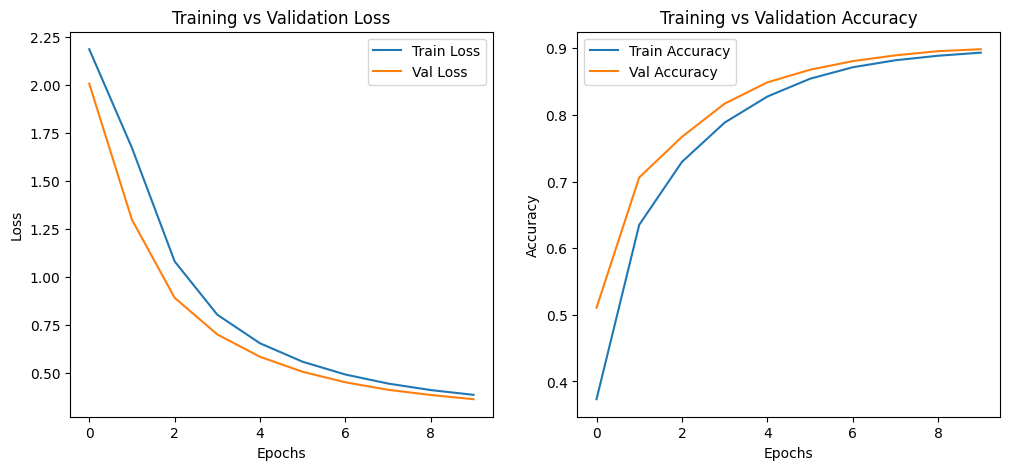

In [7]:


# =====================
# 6. Plot Loss & Accuracy
# =====================
plt.figure(figsize=(12,5))

# Training vs Validation Loss
plt.subplot(1,2,1)
plt.plot(history.history['loss'], label="Train Loss")
plt.plot(history.history['val_loss'], label="Val Loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()
plt.title("Training vs Validation Loss")

# Training vs Validation Accuracy
plt.subplot(1,2,2)
plt.plot(history.history['accuracy'], label="Train Accuracy")
plt.plot(history.history['val_accuracy'], label="Val Accuracy")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()
plt.title("Training vs Validation Accuracy")

plt.show()
